In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [3]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.3
sklearn: 0.22
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [4]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

In [5]:
#Importing data into dataframe
df =  pd.read_csv('C://Data/all.csv')

In [6]:
df.drop(['ph_PostMigratedHere','ph_UnknownSuggestionEvent','ph_QuestionMerged','ph_PostMigrated','ph_PostMigrated','p_Wiki','ph_QuestionUnmerged','ph_PostDisassociated','ph_SuggestedEditApplied','ph_UnknownDevRelatedEvent','ph_VoteNullificationByDev','ph_PostTweeted','ph_PostUnmigrated','ph_UnknownModeratorEvent','ph_UnknownEvent','ph_CommentDiscussionMovedToChat','p_PrivilegeWiki','p_WikiPlaceholder'], axis= 1, inplace=True);

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [8]:
df.head(100)

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination
0,7784035,usa,1407.0,0.0,0,0,1,2,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9126518,usa,622.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10021482,usa,370.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2739419,usa,400.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1440631,usa,32.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5303365,usa,1038.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4036517,usa,30.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10955865,usa,342.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8425017,usa,124.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6607002,usa,1366.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


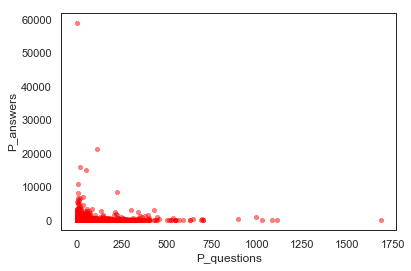

In [15]:
df.plot(kind='scatter', x='P_questions', y='P_answers',alpha = 0.5,color = 'red')

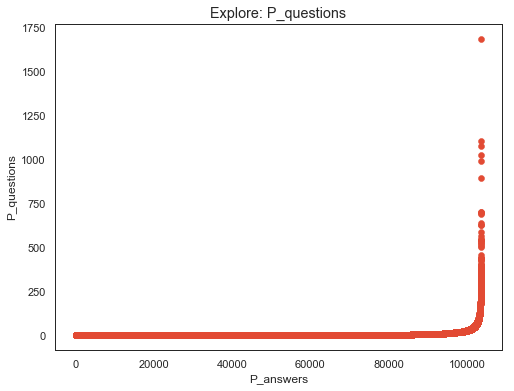

In [16]:
#show scatter plot with using Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['P_questions'].values))
plt.xlabel('P_answers')
plt.ylabel('P_questions')
plt.title('Explore: P_questions')
plt.show()

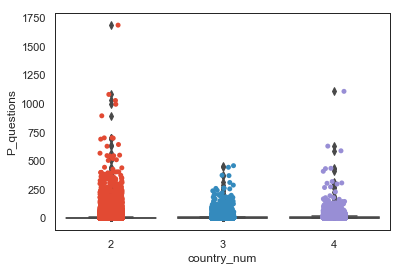

In [17]:
ax= sns.boxplot(x="country_num", y="P_questions", data=df)
ax= sns.stripplot(x="country_num", y="P_questions", data=df, jitter=True, edgecolor="gray")
plt.show()

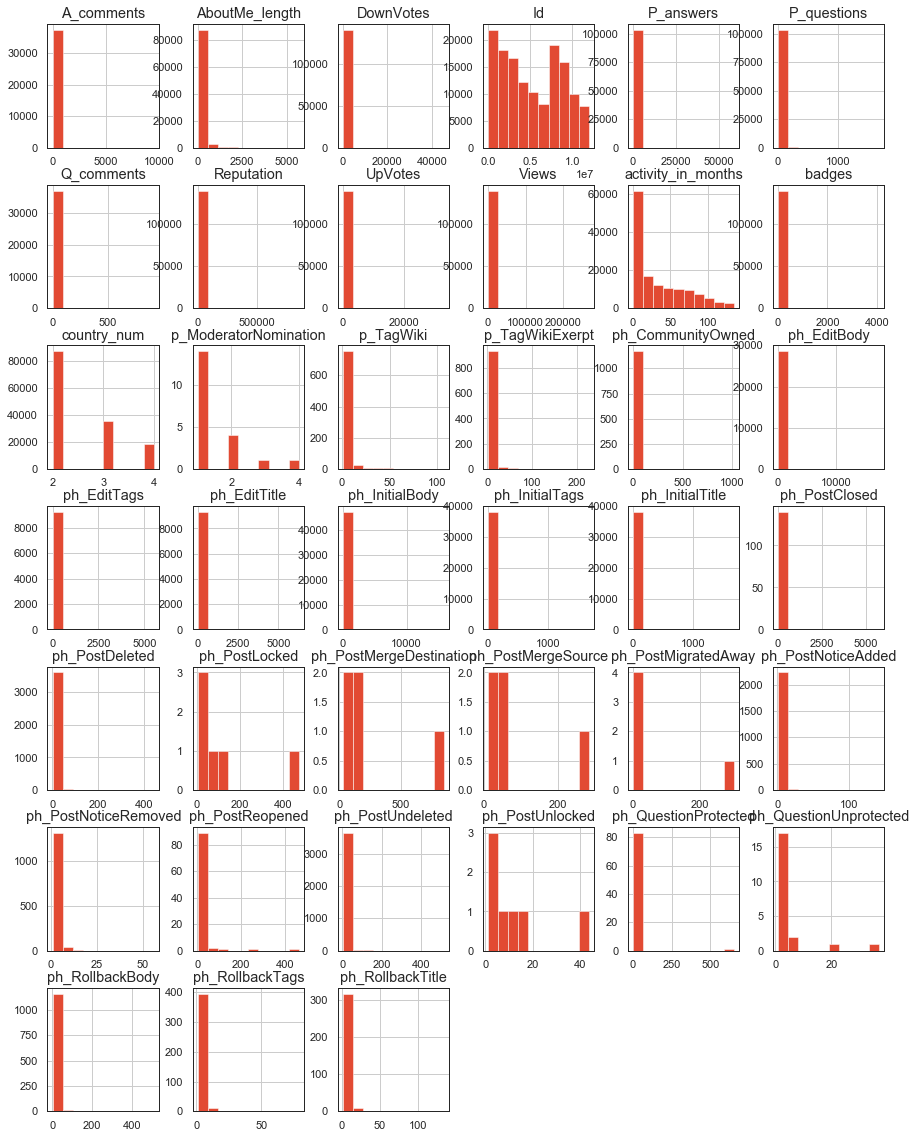

<Figure size 432x288 with 0 Axes>

In [35]:
# histograms
df.hist(figsize=(15,20));
plt.figure();

In [40]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [41]:
check_missing_data(df)

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,country_num
Total,0,0,49441,0,0,0,0,0,0,102837,102837,36436,36868,140164,139387,139232,101865,130853,92731,101869,111537,130907,139851,139011,140090,139771,140040,136545,136518,139010,140178,140177,140163,140100,138827,137924,140179,140179,140179,0
Percent,0,0,0.00352686,0,0,0,0,0,0,0.00733586,0.00733586,0.00259916,0.00262997,0.00999857,0.00994315,0.00993209,0.00726652,0.00933437,0.00661495,0.00726681,0.00795647,0.00933823,0.00997625,0.00991632,0.00999329,0.00997054,0.00998973,0.00974041,0.00973849,0.00991625,0.00999957,0.0099995,0.0099985,0.00999401,0.0099032,0.00983878,0.00999964,0.00999964,0.00999964,0
Types,int64,object,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [43]:
df["country"].value_counts()

usa       86894
china     35079
russia    18211
Name: country, dtype: int64

In [46]:
df.sample(10) 

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,country_num
117265,10722687,china,NaN,2.8,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
115733,2144720,china,178.0,78.9,444,6,2208,176,56,NaN,NaN,14.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
75479,1438490,usa,0.0,87.4,39,2,633,21,17,1.0,4.0,5.0,20.0,NaN,NaN,NaN,5.0,NaN,25.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
39488,2514014,usa,0.0,16.9,0,0,1,2,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
103850,3450828,china,0.0,41.4,0,0,13,4,3,0.0,0.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
128505,3973467,russia,0.0,25.2,0,0,1,2,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
275,10303286,usa,969.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
17471,6081577,usa,238.0,1.1,2,0,23,22,7,1.0,0.0,2.0,1.0,NaN,NaN,NaN,2.0,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123440,6015333,russia,NaN,25.4,0,0,13,6,2,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
60072,375837,usa,0.0,53.7,0,0,11,16,6,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [47]:
# statisitcal summary
df.describe()

,Id,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,country_num
count,1.401840e+05,90743.000000,140184.000000,140184.000000,140184.000000,140184.000000,140184.000000,140184.000000,37347.000000,37347.000000,103748.000000,103316.000000,20.000000,797.000000,952.000000,38319.000000,9331.000000,47453.000000,38315.000000,28647.000000,9277.000000,333.000000,1173.000000,94.000000,413.000000,144.000000,3639.000000,3666.000000,1174.000000,6.000000,7.000000,21.000000,84.000000,1357.000000,2260.000000,5.000000,5.000000,5.000000,140184.000000
mean,5.251181e+06,103.690577,33.382064,52.970803,5.989064,536.405096,64.228871,8.721038,7.093528,14.268348,5.088956,15.091419,1.450000,3.235885,3.330882,9.704716,11.081878,29.934609,9.701918,31.170245,15.748626,3.873874,4.936914,19.127660,2.639225,151.555556,3.436933,3.464266,3.462521,115.166667,12.000000,4.238095,14.440476,2.040531,2.381416,81.200000,66.000000,246.800000,2.510051
std,3.495964e+06,240.950008,35.743248,355.483511,190.498825,6635.893895,1215.048357,34.821952,22.636357,121.990030,20.931389,237.686191,0.825578,7.869352,10.383740,29.746893,99.540760,183.179385,29.736605,243.233769,122.145148,11.631996,22.271083,54.858221,6.232791,647.344989,14.806051,15.897882,31.205147,179.208724,15.209646,8.642365,71.385657,3.421989,4.604943,114.707018,131.556072,340.281795,0.713946
min,2.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,28.000000,2.000000
25%,2.032368e+06,0.000000,2.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,25.000000,2.500000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,61.000000,2.000000
50%,4.931076e+06,22.000000,19.400000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,4.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,12.500000,1.000000,1.000000,1.000000,43.500000,6.000000,1.000000,2.000000,1.000000,1.000000,43.000000,9.000000,147.000000,2.000000
75%,8.322574e+06,99.000000,58.500000,4.000000,0.000000,57.000000,13.000000,6.000000,6.000000,4.000000,3.000000,4.000000,2.000000,2.000000,2.000000,8.000000,4.000000,16.000000,8.000000,12.000000,5.000000,2.000000,3.000000,17.000000,2.000000,56.500000,2.000000,2.000000,2.000000,92.000000,14.000000,2.000000,8.000000,2.000000,2.000000,52.000000,18.000000,150.000000,3.000000
max,1.200465e+07,5687.000000,134.900000,32909.000000,45436.000000,851064.000000,268394.000000,4097.000000,921.000000,9548.000000,1686.000000,59042.000000,4.000000,107.000000,227.000000,1686.000000,6279.000000,15888.000000,1686.000000,17399.000000,5527.000000,135.000000,510.000000,465.000000,79.000000,5767.000000,442.000000,518.000000,1019.000000,474.000000,44.000000,37.000000,654.000000,56.000000,143.000000,284.000000,301.000000,848.000000,4.000000


In [51]:
df.groupby('country').count()

,Id,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,country_num
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
china,35079,18509,35079,35079,35079,35079,35079,35079,3401,3401,9737,9015,0,55,61,3900,651,5042,3900,2350,565,11,52,2,13,2,224,233,46,0,0,0,1,60,94,0,0,0,35079
russia,18211,11460,18211,18211,18211,18211,18211,18211,727,727,7117,7407,1,84,102,745,133,1033,745,586,145,0,8,0,2,0,57,60,10,0,0,0,1,21,40,0,0,0,18211
usa,86894,60774,86894,86894,86894,86894,86894,86894,33219,33219,86894,86894,19,658,789,33674,8547,41378,33670,25711,8567,322,1113,92,398,142,3358,3373,1118,6,7,21,82,1276,2126,5,5,5,86894


In [52]:
def encode_features(df):
    feature = ['country']   
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
    return df

In [53]:
encode_features(df)

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,country_num
0,7784035,2,1407.0,0.0,0,0,1,2,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,9126518,2,622.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,10021482,2,370.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2739419,2,400.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1440631,2,32.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,5303365,2,1038.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,4036517,2,30.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,10955865,2,342.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8,8425017,2,124.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,6607002,2,1366.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
